In [ ]:
%pip install pandas matplotlib seaborn scikit-learn statsmodels prophet torch 
%pip install pytorch-lightning pytorch-forecasting torchmetrics

## Prophet

22:52:47 - cmdstanpy - INFO - Chain [1] start processing
22:52:47 - cmdstanpy - INFO - Chain [1] done processing



📈 Forecasting for South Korea...


/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


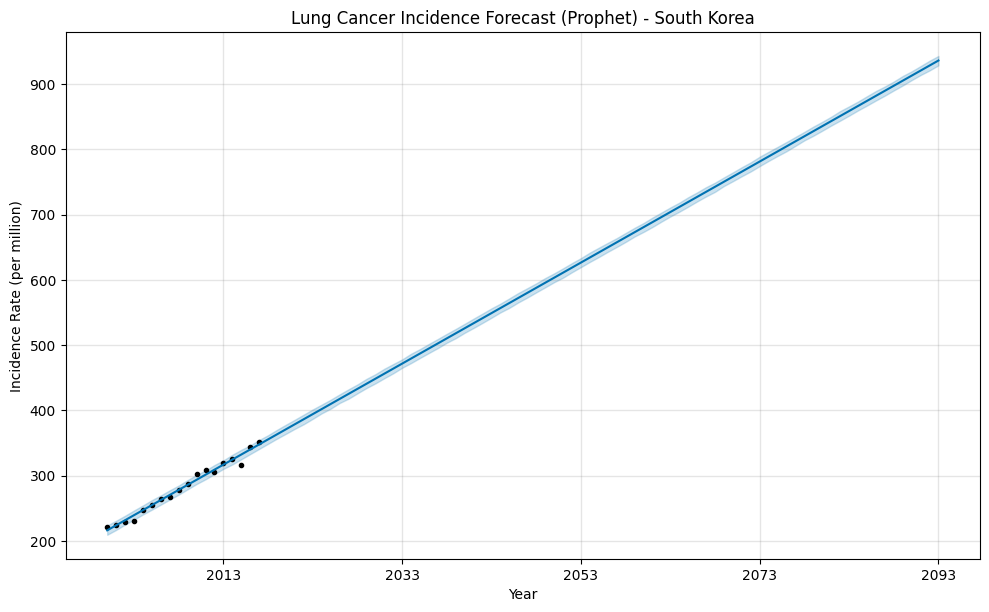

22:52:47 - cmdstanpy - INFO - Chain [1] start processing
22:52:48 - cmdstanpy - INFO - Chain [1] done processing



📈 Forecasting for USA...


/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


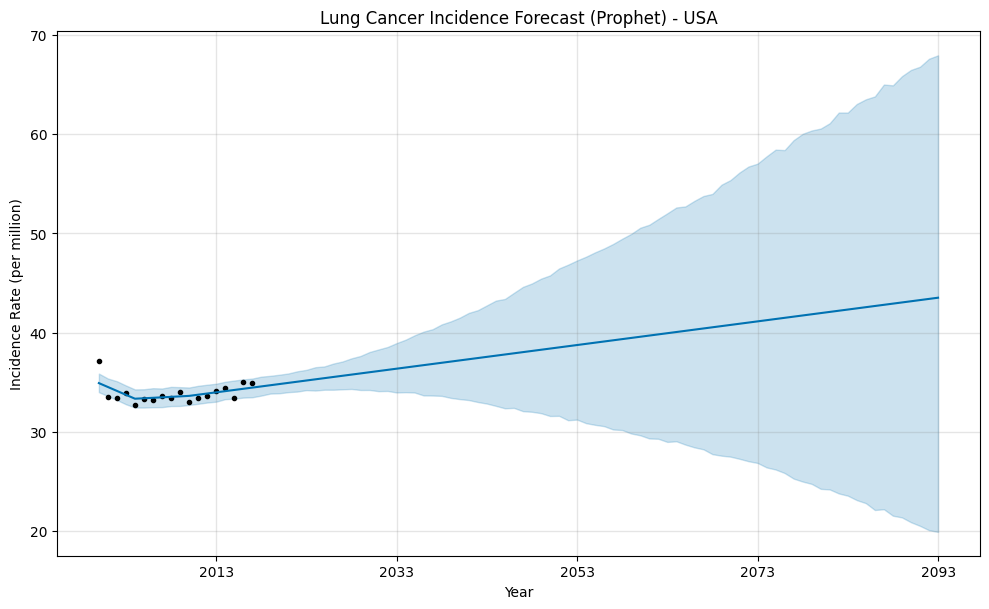

22:52:48 - cmdstanpy - INFO - Chain [1] start processing
22:52:48 - cmdstanpy - INFO - Chain [1] done processing



📈 Forecasting for Canada...


/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


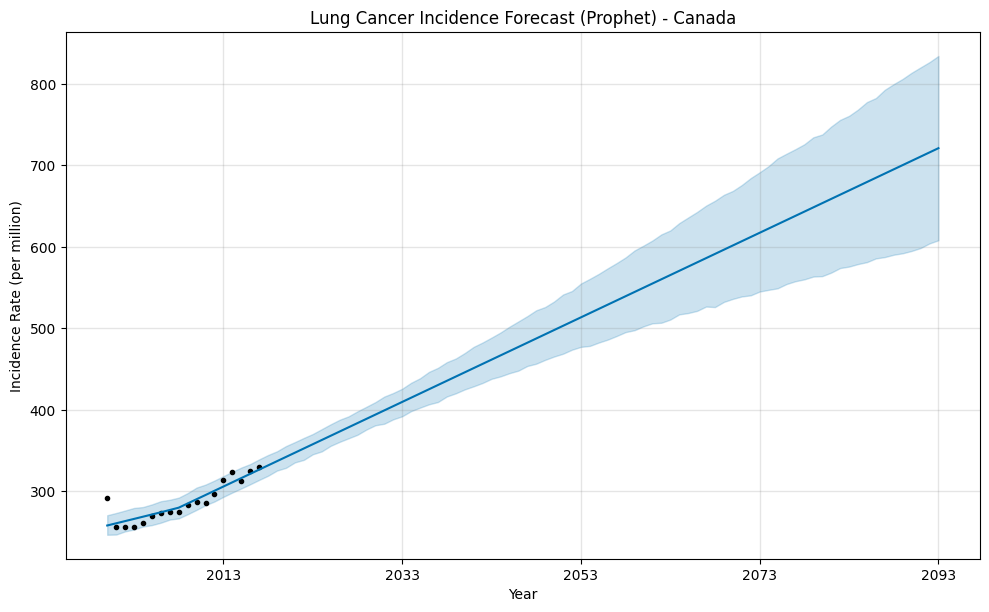

22:52:48 - cmdstanpy - INFO - Chain [1] start processing
22:52:48 - cmdstanpy - INFO - Chain [1] done processing



📈 Forecasting for The Netherlands...


/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


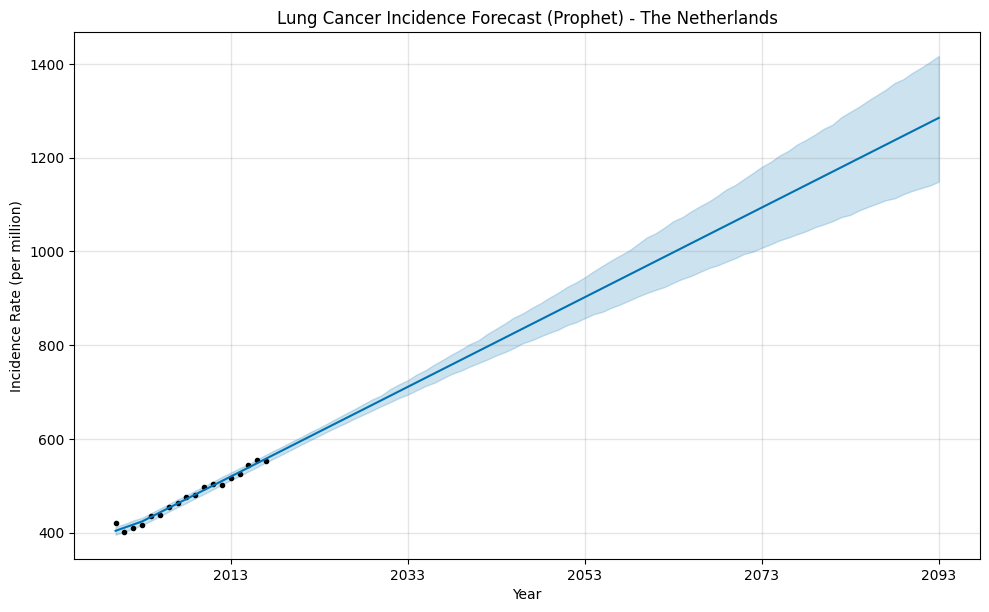

22:52:48 - cmdstanpy - INFO - Chain [1] start processing
22:52:48 - cmdstanpy - INFO - Chain [1] done processing



📈 Forecasting for Australia...


/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


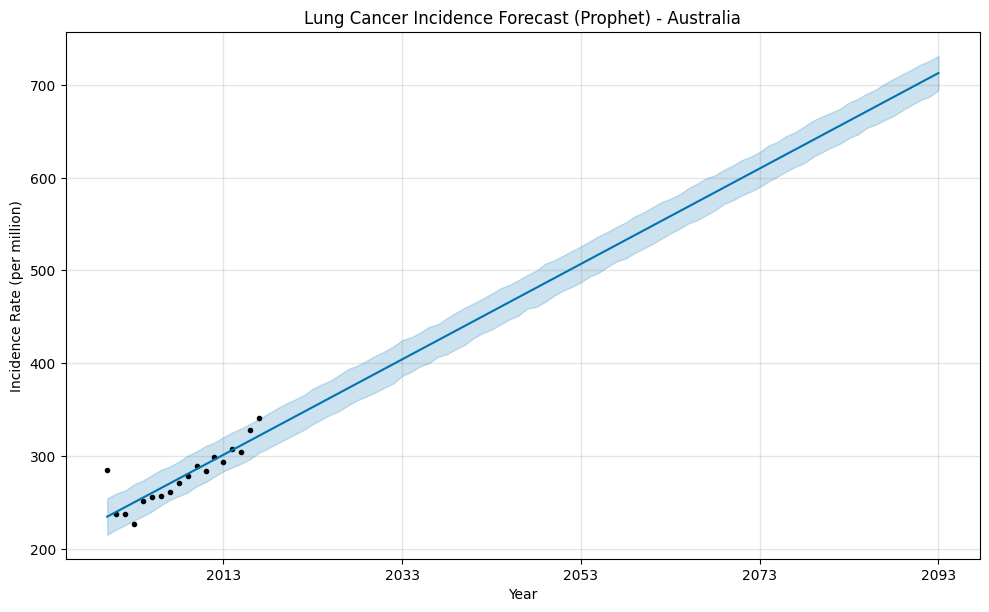

22:52:48 - cmdstanpy - INFO - Chain [1] start processing
22:52:49 - cmdstanpy - INFO - Chain [1] done processing



📈 Forecasting for Japan...


/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


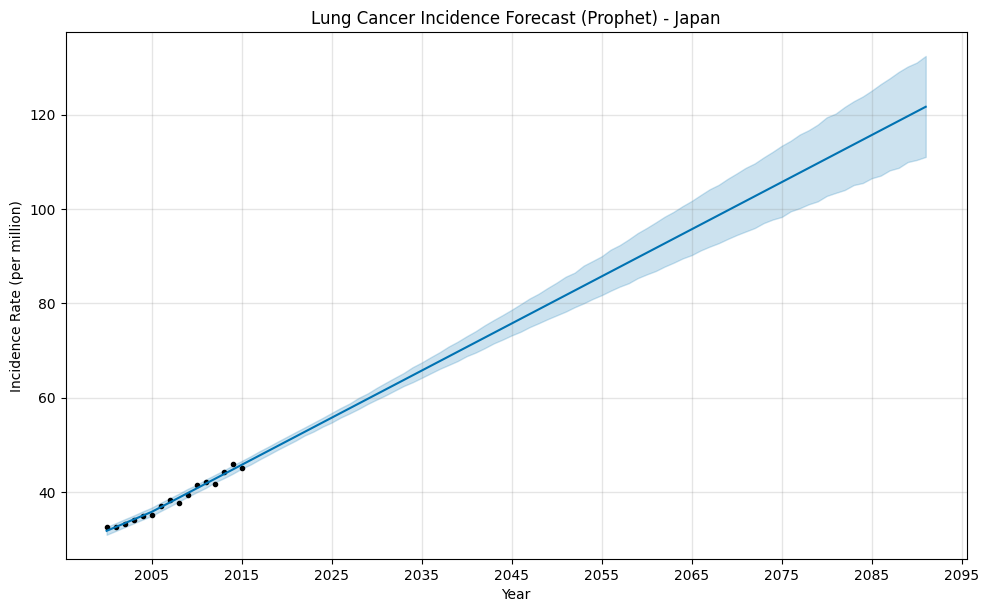

22:52:49 - cmdstanpy - INFO - Chain [1] start processing
22:52:49 - cmdstanpy - INFO - Chain [1] done processing



📈 Forecasting for Denmark...


/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


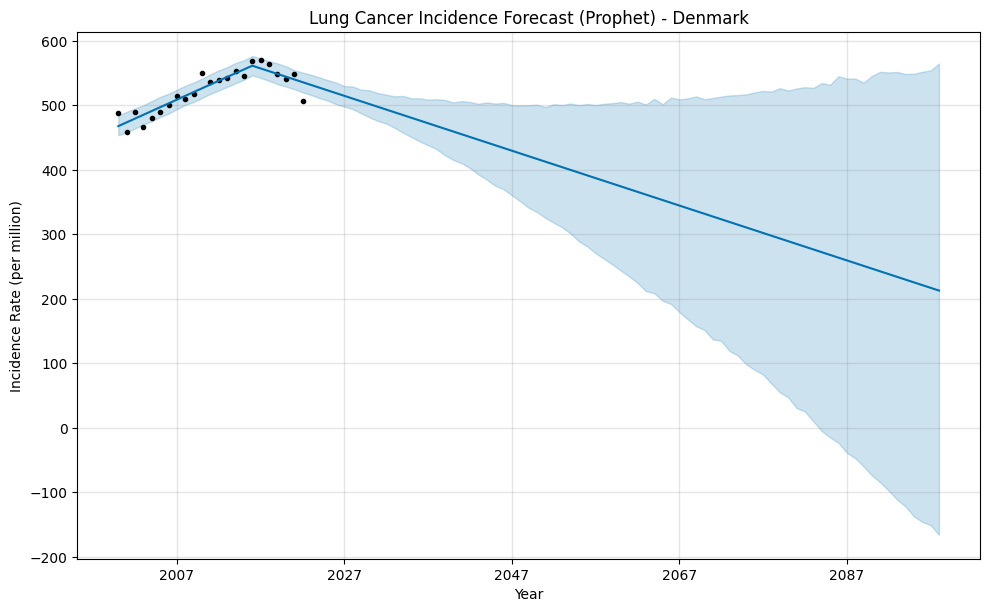

22:52:49 - cmdstanpy - INFO - Chain [1] start processing
22:52:49 - cmdstanpy - INFO - Chain [1] done processing



📈 Forecasting for China...


/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


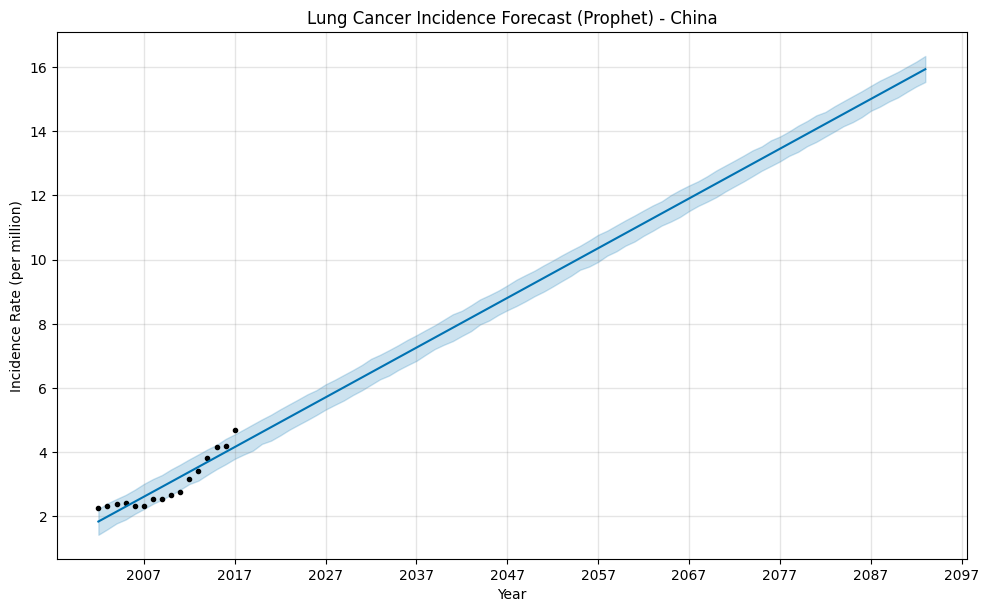

22:52:49 - cmdstanpy - INFO - Chain [1] start processing
22:52:49 - cmdstanpy - INFO - Chain [1] done processing



📈 Forecasting for Belarus...


/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


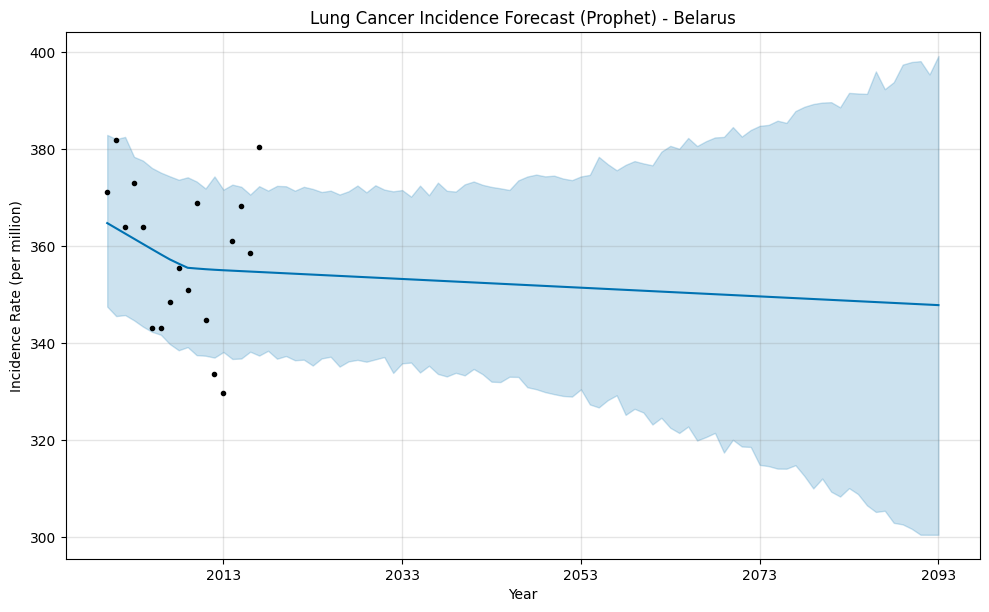

22:52:50 - cmdstanpy - INFO - Chain [1] start processing
22:52:50 - cmdstanpy - INFO - Chain [1] done processing



📈 Forecasting for Austria...


/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


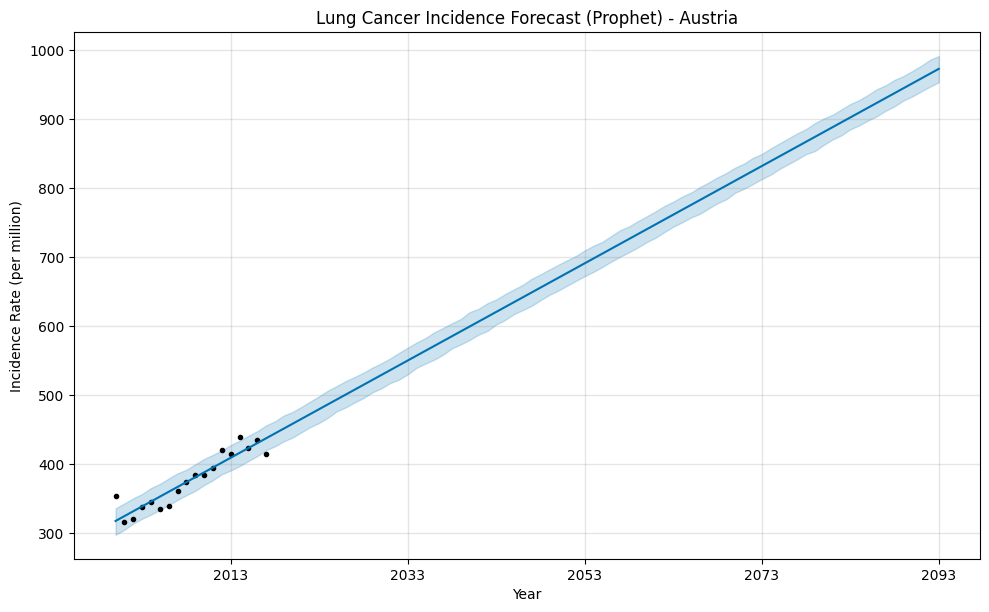

In [13]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("../normalized_data.csv")

# Filter to lung cancer incidence only
lung_df = df[
    (df['cancer_name'].str.lower() == 'lung') &
    (df['measure'].str.lower() == 'incidence')
].copy()

# Rescale rate (per million)
lung_df['rate'] = lung_df['rate'] * 1e6

# Identify top 10 countries by total incidence burden
top_countries = (
    lung_df.groupby('country_name')['new_cases/deaths']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index.tolist()
)

# Forecast loop for each country
for country in top_countries:
    print(f"\n📈 Forecasting for {country}...")
    
    country_df = lung_df[lung_df['country_name'] == country]

    df_prophet = country_df[['year', 'rate']].rename(columns={'year': 'ds', 'rate': 'y'})
    df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')

    model = Prophet(yearly_seasonality=False)
    model.fit(df_prophet)

    future = model.make_future_dataframe(periods=76, freq='Y')  # up to 2100
    forecast = model.predict(future)

    # Plot
    fig = model.plot(forecast)
    plt.title(f"Lung Cancer Incidence Forecast (Prophet) - {country}")
    plt.ylabel("Incidence Rate (per million)")
    plt.xlabel("Year")
    plt.grid(True)
    plt.show()

## ARIMA


📈 Forecasting for South Korea...


/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWar

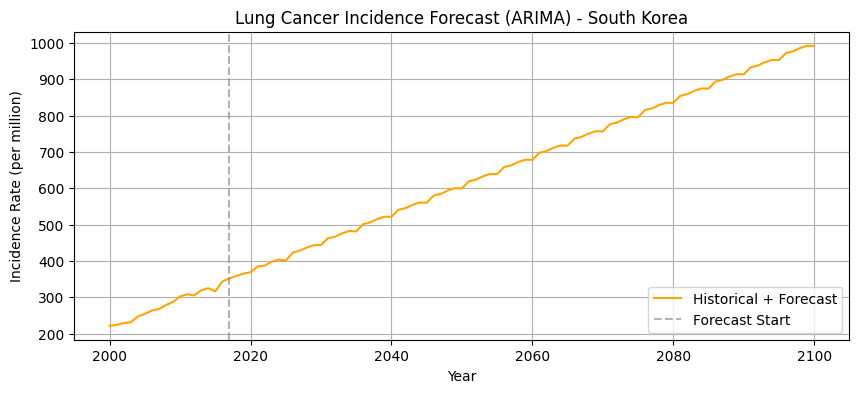


📈 Forecasting for USA...


/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWar

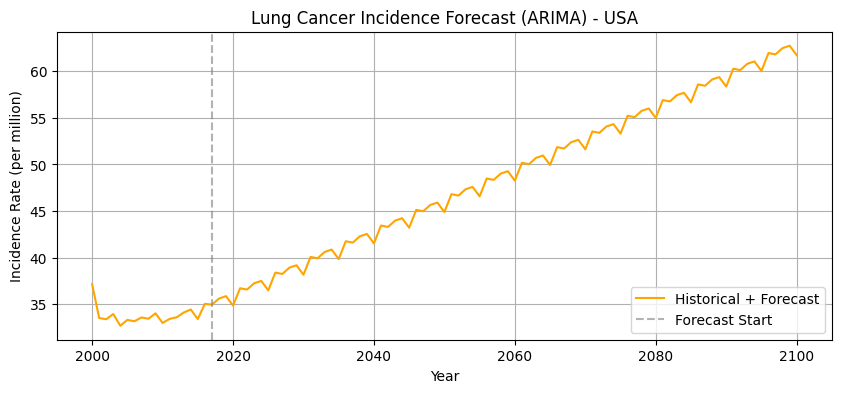

/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)



📈 Forecasting for Canada...


/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


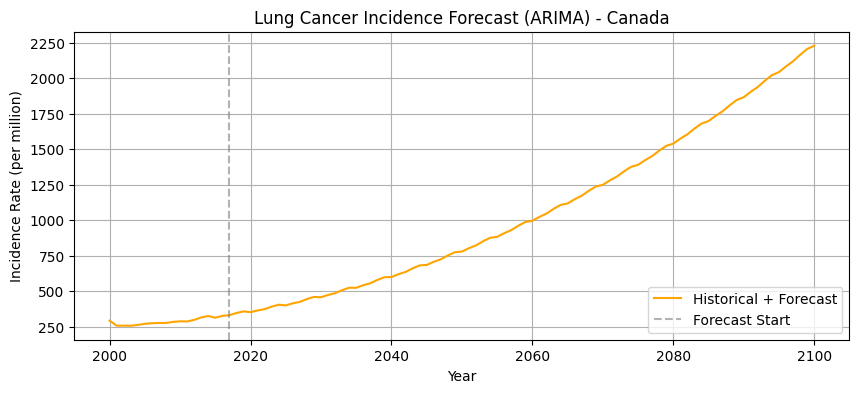

/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWar


📈 Forecasting for The Netherlands...


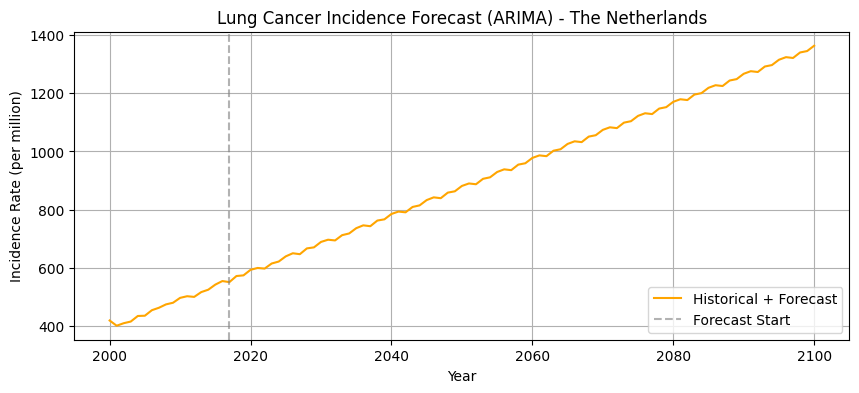


📈 Forecasting for Australia...


/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax

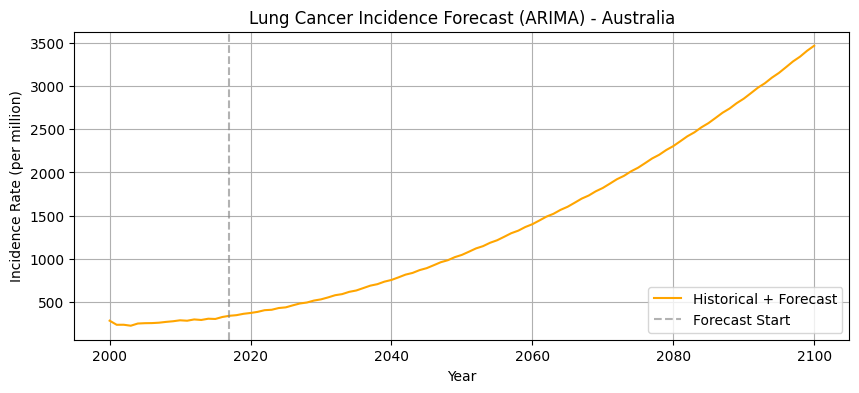


📈 Forecasting for Japan...


/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueW

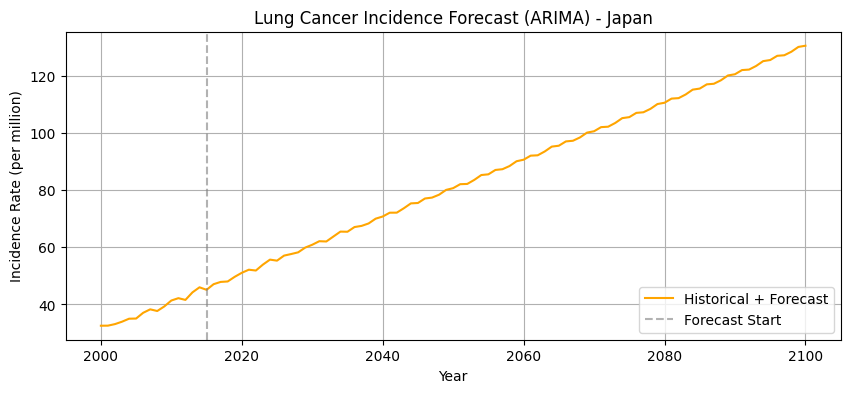


📈 Forecasting for Denmark...


/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWar

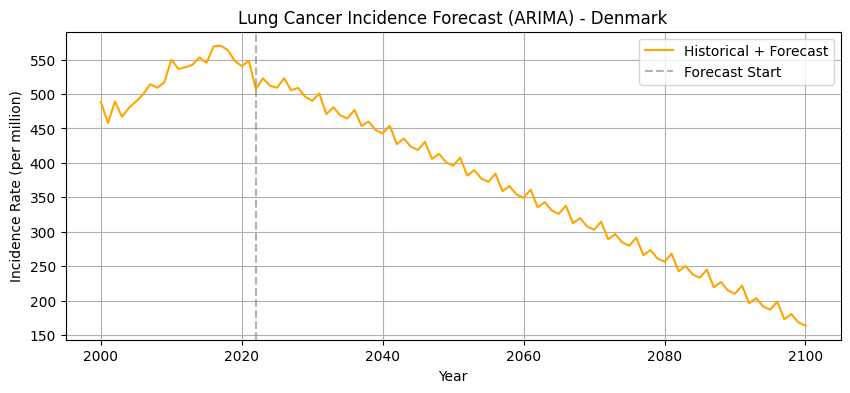


📈 Forecasting for China...


/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:

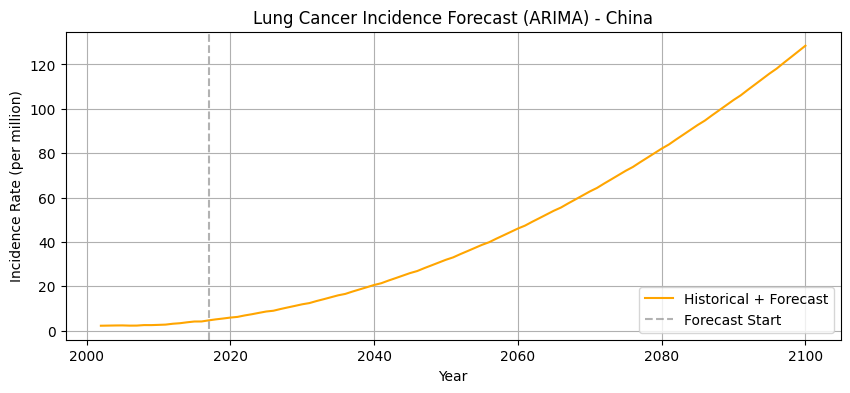

/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)



📈 Forecasting for Belarus...


/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


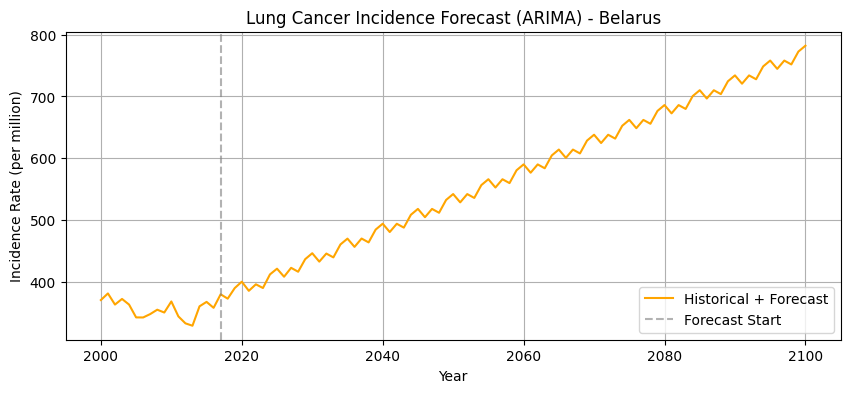


📈 Forecasting for Austria...


/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/mira-ali/BAU/data_analytics/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax

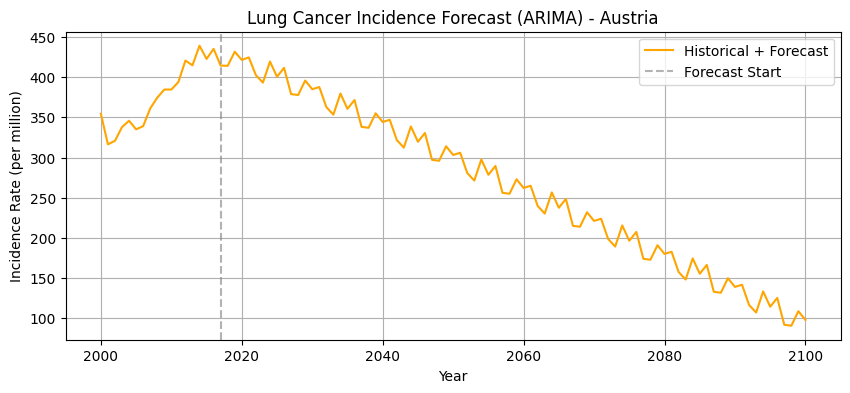

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load dataset
df = pd.read_csv("../normalized_data.csv")

# Filter for lung cancer incidence
lung_df = df[
    (df['cancer_name'].str.lower() == 'lung') &
    (df['measure'].str.lower() == 'incidence')
].copy()

# Rescale rate to per million
lung_df['rate'] = lung_df['rate'] * 1e6

# Identify top 10 countries by total burden
top_countries = (
    lung_df.groupby('country_name')['new_cases/deaths']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index.tolist()
)

# Loop through each country
for country in top_countries:
    print(f"\n📈 Forecasting for {country}...")
    
    country_data = lung_df[lung_df['country_name'] == country]
    series = country_data.set_index('year').sort_index()['rate']

    try:
        # Fit ARIMA model
        model = SARIMAX(series, order=(1, 1, 1), seasonal_order=(1, 1, 0, 5))
        model_fit = model.fit(disp=False)

        # Forecast from last known year to 2100
        last_year = series.index.max()
        forecast_years = range(last_year + 1, 2101)
        forecast = model_fit.forecast(steps=len(forecast_years))
        forecast.index = forecast_years

        # Combine series for smooth plot
        full_series = pd.concat([series, forecast])

        # Plot
        plt.figure(figsize=(10, 4))
        plt.plot(full_series.index, full_series.values, label='Historical + Forecast', color='orange')
        plt.axvline(x=last_year, linestyle='--', color='gray', alpha=0.6, label='Forecast Start')
        plt.title(f"Lung Cancer Incidence Forecast (ARIMA) - {country}")
        plt.xlabel("Year")
        plt.ylabel("Incidence Rate (per million)")
        plt.legend()
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"⚠️ Could not forecast for {country}: {e}")

## LSTM


📈 Forecasting LSTM for South Korea


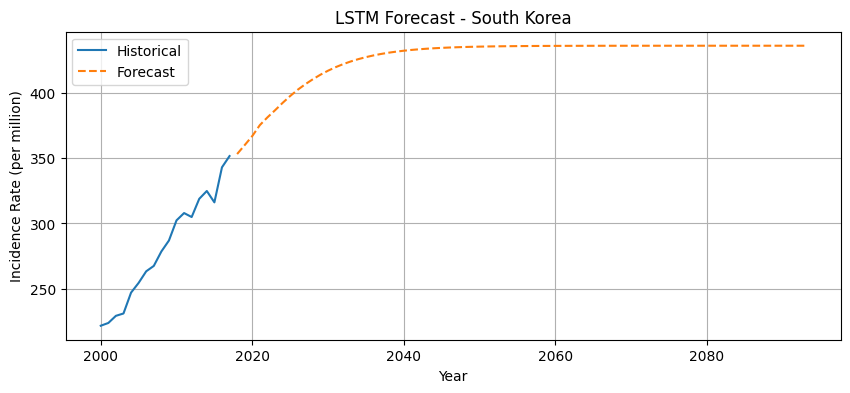


📈 Forecasting LSTM for USA


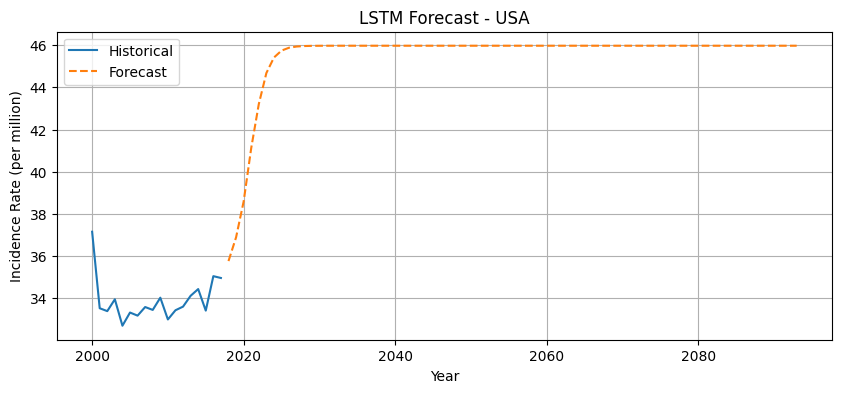


📈 Forecasting LSTM for Canada


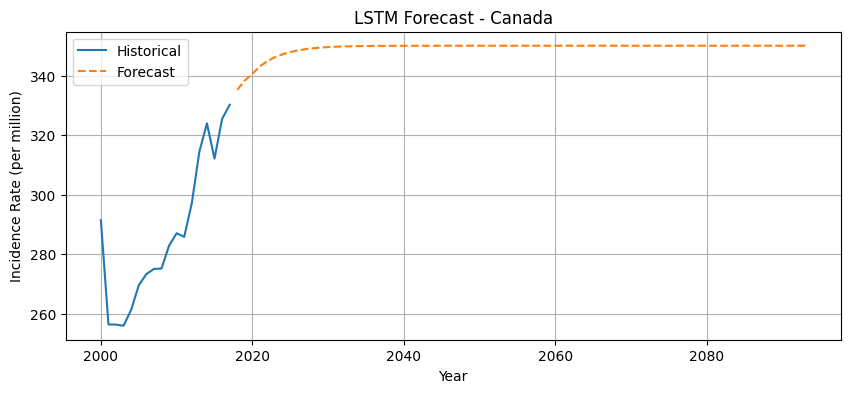


📈 Forecasting LSTM for The Netherlands


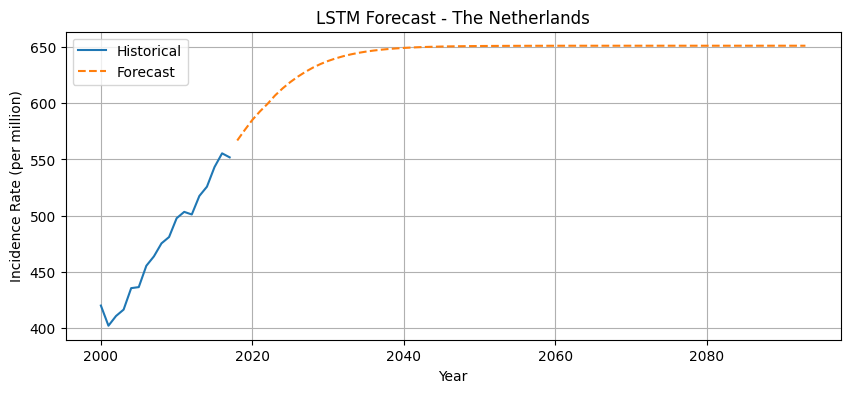


📈 Forecasting LSTM for Australia


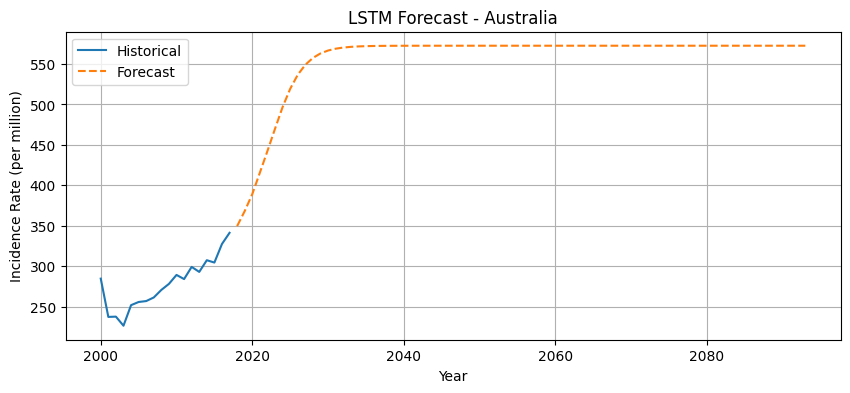


📈 Forecasting LSTM for Japan


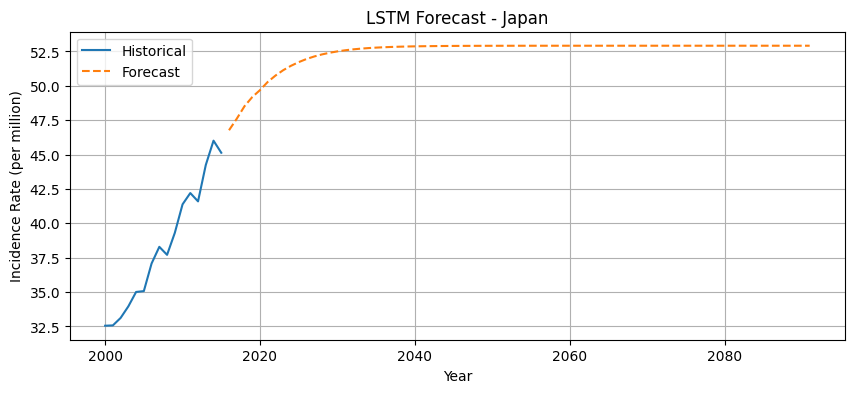


📈 Forecasting LSTM for Denmark


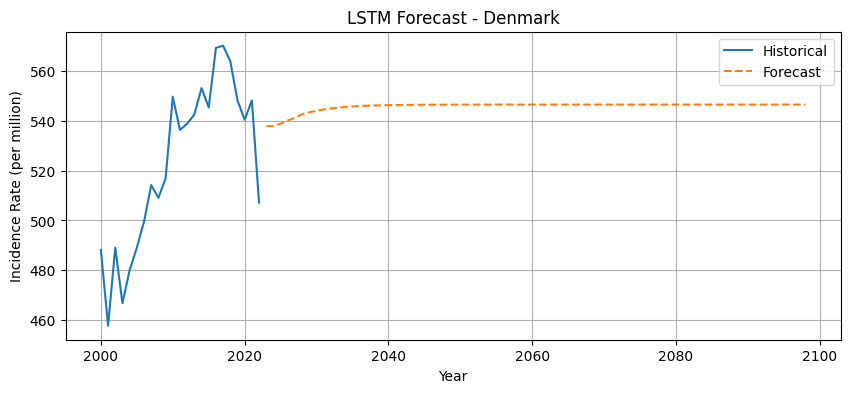


📈 Forecasting LSTM for China


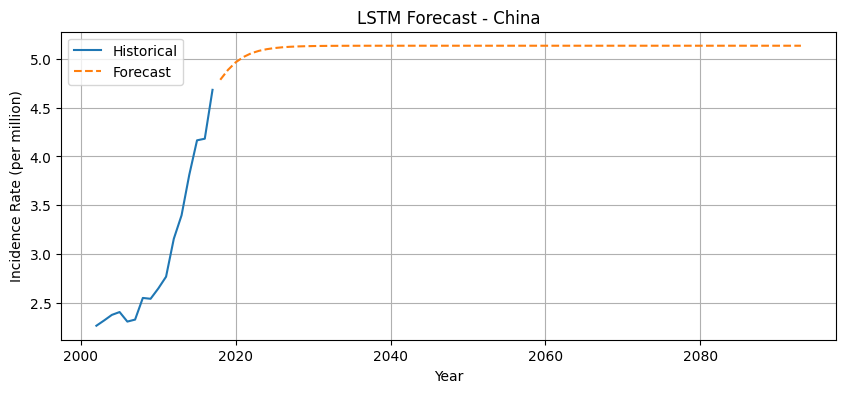


📈 Forecasting LSTM for Belarus


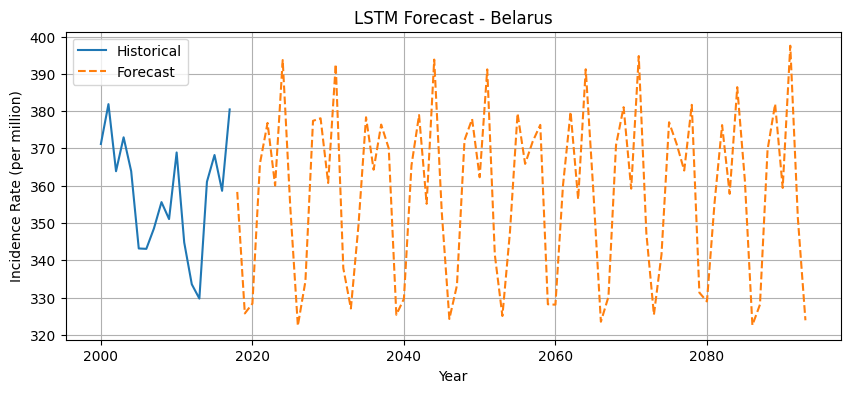


📈 Forecasting LSTM for Austria


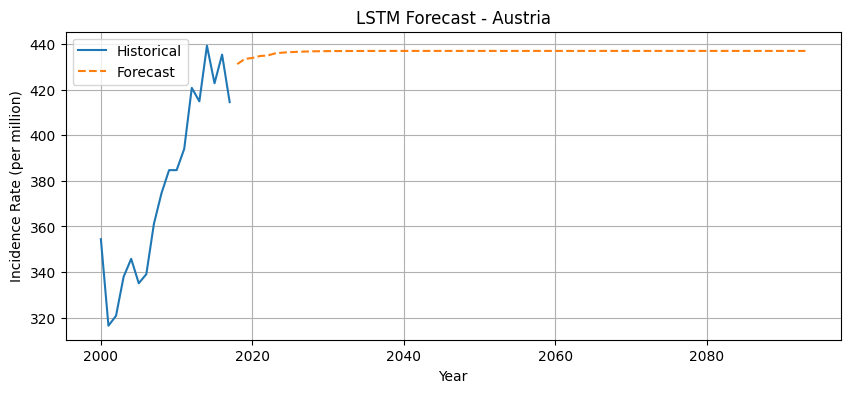

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv("../normalized_data.csv")

# Filter and preprocess
lung_df = df[
    (df['cancer_name'].str.lower() == 'lung') &
    (df['measure'].str.lower() == 'incidence')
].copy()
lung_df['rate'] = lung_df['rate'] * 1e6

# Top countries
top_countries = (
    lung_df.groupby('country_name')['new_cases/deaths']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index.tolist()
)

# Parameters
sequence_length = 5
forecast_steps = 76  # 2025–2100

# LSTM Model
class LSTMModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=64, batch_first=True)
        self.linear = nn.Linear(64, 1)

    def forward(self, x):
        _, (h_n, _) = self.lstm(x)
        return self.linear(h_n[-1])

# Forecasting loop
for country in top_countries:
    print(f"\n📈 Forecasting LSTM for {country}")
    
    # Prepare time series
    country_df = lung_df[lung_df['country_name'] == country].sort_values('year')
    years = country_df['year'].values
    series = country_df['rate'].values.reshape(-1, 1)

    # Normalize
    scaler = MinMaxScaler()
    series_scaled = scaler.fit_transform(series)

    # Create input sequences
    X, y = [], []
    for i in range(len(series_scaled) - sequence_length):
        X.append(series_scaled[i:i + sequence_length])
        y.append(series_scaled[i + sequence_length])
    X = torch.FloatTensor(X)
    y = torch.FloatTensor(y)

    # Define and train model
    model = LSTMModel()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    loss_fn = nn.MSELoss()

    for epoch in range(100):
        model.train()
        output = model(X)
        loss = loss_fn(output, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Forecast
    model.eval()
    predictions = []
    input_seq = torch.FloatTensor(series_scaled[-sequence_length:]).unsqueeze(0)

    for _ in range(forecast_steps):
        with torch.no_grad():
            pred = model(input_seq)
        predictions.append(pred.item())
        next_step = pred.view(1, 1, 1)
        input_seq = torch.cat((input_seq[:, 1:, :], next_step), dim=1)

    # Inverse transform
    forecast = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

    # Correct time axis
    historical_years = years
    forecast_years = np.arange(historical_years.max() + 1, historical_years.max() + 1 + forecast_steps)

    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(historical_years, series.flatten(), label="Historical")
    plt.plot(forecast_years, forecast, label="Forecast", linestyle='--')
    plt.title(f"LSTM Forecast - {country}")
    plt.xlabel("Year")
    plt.ylabel("Incidence Rate (per million)")
    plt.legend()
    plt.grid(True)
    plt.show()